# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

In [3]:
print('%s,%s,%s,%s,%s,%s'%(X_train.shape,y_train.shape,
X_val.shape,
y_val.shape,
X_test.shape,
y_test.shape))

(49000, 32, 32, 3),(49000,),(1000, 32, 32, 3),(1000,),(1000, 32, 32, 3),(1000,)


## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [4]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
print mean_feat.shape,X_train_feats.shape
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [ ]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [1e5, 1e6, 1e7]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for key in ((ii,jj) for ii in learning_rates for jj in regularization_strengths):
    svm=LinearSVM()
    loss_hist = svm.train(X_train_feats, y_train, learning_rate=key[0], reg=key[1],
                      num_iters=2500, verbose=True)
    y_val_pred = svm.predict(X_val_feats)
    y_train_pred = svm.predict(X_train_feats)
    val_acc=np.mean(y_val == y_val_pred)
    results[key]=((np.mean(y_train == y_train_pred),val_acc))
    print results
    if best_val<val_acc:
        best_val= val_acc
        best_svm=svm

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

In [ ]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

In [ ]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?
they have some feature that the wrong label has

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [6]:
print X_train_feats.shape,y_train,X_val_feats.shape,y_val.shape

(49000, 155) [6 9 9 ..., 4 9 3] (1000, 155) (1000,)


iteration 0 / 18000: loss 3.590684
iteration 100 / 18000: loss 2.256692
iteration 200 / 18000: loss 2.090440
iteration 300 / 18000: loss 2.053815
iteration 400 / 18000: loss 1.929189
iteration 500 / 18000: loss 1.915401
iteration 600 / 18000: loss 1.971790
iteration 700 / 18000: loss 1.928189
iteration 800 / 18000: loss 1.798238
iteration 900 / 18000: loss 1.942207
iteration 1000 / 18000: loss 1.767277
iteration 1100 / 18000: loss 1.845572
iteration 1200 / 18000: loss 1.901681
iteration 1300 / 18000: loss 1.811048
iteration 1400 / 18000: loss 1.657870
iteration 1500 / 18000: loss 1.765178
iteration 1600 / 18000: loss 1.762748
iteration 1700 / 18000: loss 1.710603
iteration 1800 / 18000: loss 1.712912
iteration 1900 / 18000: loss 1.767827
iteration 2000 / 18000: loss 1.734080
iteration 2100 / 18000: loss 1.733814
iteration 2200 / 18000: loss 1.832139
iteration 2300 / 18000: loss 1.681124
iteration 2400 / 18000: loss 1.668932
iteration 2500 / 18000: loss 1.811261
iteration 2600 / 18000: 

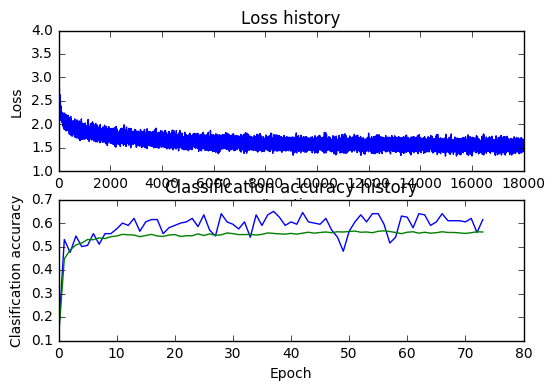

0.56
iteration 0 / 18000: loss 3.521785
iteration 100 / 18000: loss 2.265206
iteration 200 / 18000: loss 2.111960
iteration 300 / 18000: loss 2.142305
iteration 400 / 18000: loss 2.106615
iteration 500 / 18000: loss 2.008070
iteration 600 / 18000: loss 2.098508
iteration 700 / 18000: loss 1.998719
iteration 800 / 18000: loss 2.085189
iteration 900 / 18000: loss 1.967072
iteration 1000 / 18000: loss 1.741394
iteration 1100 / 18000: loss 1.938837
iteration 1200 / 18000: loss 1.966990
iteration 1300 / 18000: loss 1.799433
iteration 1400 / 18000: loss 1.809286
iteration 1500 / 18000: loss 1.979054
iteration 1600 / 18000: loss 1.791145
iteration 1700 / 18000: loss 1.852049
iteration 1800 / 18000: loss 1.801816
iteration 1900 / 18000: loss 1.896832
iteration 2000 / 18000: loss 1.981729
iteration 2100 / 18000: loss 1.944499
iteration 2200 / 18000: loss 1.713040
iteration 2300 / 18000: loss 1.948523
iteration 2400 / 18000: loss 1.784595
iteration 2500 / 18000: loss 1.791298
iteration 2600 / 18

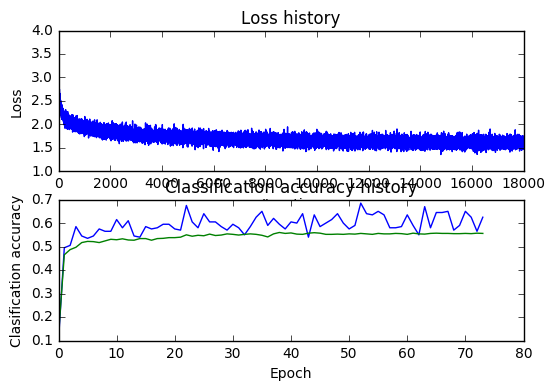

0.551
iteration 0 / 18000: loss 3.706546
iteration 100 / 18000: loss 2.471306
iteration 200 / 18000: loss 2.322274
iteration 300 / 18000: loss 2.180358
iteration 400 / 18000: loss 2.010987
iteration 500 / 18000: loss 2.080122
iteration 600 / 18000: loss 2.112844
iteration 700 / 18000: loss 2.073844
iteration 800 / 18000: loss 2.015760
iteration 900 / 18000: loss 2.114283
iteration 1000 / 18000: loss 1.965894
iteration 1100 / 18000: loss 1.999159
iteration 1200 / 18000: loss 1.984743
iteration 1300 / 18000: loss 1.961702
iteration 1400 / 18000: loss 1.912331
iteration 1500 / 18000: loss 1.992170
iteration 1600 / 18000: loss 2.094232
iteration 1700 / 18000: loss 1.959840
iteration 1800 / 18000: loss 2.020633
iteration 1900 / 18000: loss 1.854728
iteration 2000 / 18000: loss 1.911674
iteration 2100 / 18000: loss 1.811096
iteration 2200 / 18000: loss 1.867758
iteration 2300 / 18000: loss 1.836627
iteration 2400 / 18000: loss 1.820292
iteration 2500 / 18000: loss 1.896169
iteration 2600 / 1

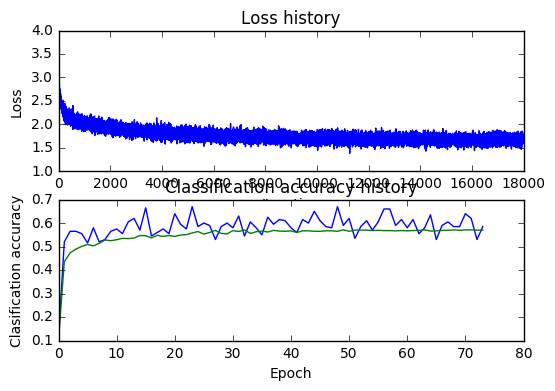

0.541
iteration 0 / 18000: loss 3.966088
iteration 100 / 18000: loss 2.601246
iteration 200 / 18000: loss 2.403550
iteration 300 / 18000: loss 2.359370
iteration 400 / 18000: loss 2.208109
iteration 500 / 18000: loss 2.078954
iteration 600 / 18000: loss 2.208290
iteration 700 / 18000: loss 2.076151
iteration 800 / 18000: loss 2.197678
iteration 900 / 18000: loss 2.148131
iteration 1000 / 18000: loss 2.139505
iteration 1100 / 18000: loss 2.106538
iteration 1200 / 18000: loss 2.064290
iteration 1300 / 18000: loss 1.998462
iteration 1400 / 18000: loss 2.069170
iteration 1500 / 18000: loss 2.110162
iteration 1600 / 18000: loss 2.017973
iteration 1700 / 18000: loss 2.047860
iteration 1800 / 18000: loss 2.034413
iteration 1900 / 18000: loss 1.967876
iteration 2000 / 18000: loss 2.002066
iteration 2100 / 18000: loss 1.882286
iteration 2200 / 18000: loss 1.971097
iteration 2300 / 18000: loss 1.994553
iteration 2400 / 18000: loss 1.943047
iteration 2500 / 18000: loss 1.772480
iteration 2600 / 1

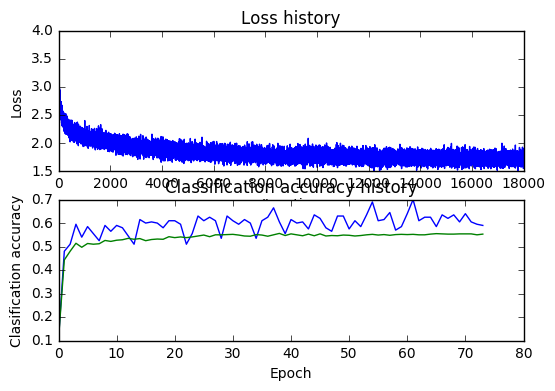

0.526
iteration 0 / 18000: loss 4.254252
iteration 100 / 18000: loss 2.621626
iteration 200 / 18000: loss 2.457786
iteration 300 / 18000: loss 2.383127
iteration 400 / 18000: loss 2.285319
iteration 500 / 18000: loss 2.350894
iteration 600 / 18000: loss 2.356913
iteration 700 / 18000: loss 2.249458
iteration 800 / 18000: loss 2.165345
iteration 900 / 18000: loss 2.323260
iteration 1000 / 18000: loss 2.262149
iteration 1100 / 18000: loss 2.188078
iteration 1200 / 18000: loss 2.275971
iteration 1300 / 18000: loss 2.128170
iteration 1400 / 18000: loss 2.142019
iteration 1500 / 18000: loss 2.137795
iteration 1600 / 18000: loss 2.143799
iteration 1700 / 18000: loss 2.249116
iteration 1800 / 18000: loss 2.075684
iteration 1900 / 18000: loss 2.238659
iteration 2000 / 18000: loss 2.023384
iteration 2100 / 18000: loss 1.968826
iteration 2200 / 18000: loss 2.119491
iteration 2300 / 18000: loss 1.994633
iteration 2400 / 18000: loss 2.046280
iteration 2500 / 18000: loss 2.134670
iteration 2600 / 1

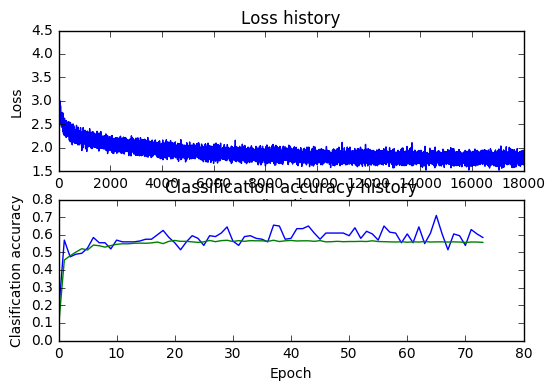

0.556
iteration 0 / 18000: loss 4.233449
iteration 100 / 18000: loss 2.672088
iteration 200 / 18000: loss 2.586161
iteration 300 / 18000: loss 2.402162
iteration 400 / 18000: loss 2.483346
iteration 500 / 18000: loss 2.421802
iteration 600 / 18000: loss 2.487664
iteration 700 / 18000: loss 2.325145
iteration 800 / 18000: loss 2.364545
iteration 900 / 18000: loss 2.340467
iteration 1000 / 18000: loss 2.235942
iteration 1100 / 18000: loss 2.243437
iteration 1200 / 18000: loss 2.177381
iteration 1300 / 18000: loss 2.272659
iteration 1400 / 18000: loss 2.391369
iteration 1500 / 18000: loss 2.182169
iteration 1600 / 18000: loss 2.186871
iteration 1700 / 18000: loss 2.205408
iteration 1800 / 18000: loss 2.252863
iteration 1900 / 18000: loss 2.160109
iteration 2000 / 18000: loss 2.276709
iteration 2100 / 18000: loss 2.239056
iteration 2200 / 18000: loss 2.130267
iteration 2300 / 18000: loss 2.104224
iteration 2400 / 18000: loss 2.164767
iteration 2500 / 18000: loss 2.134060
iteration 2600 / 1

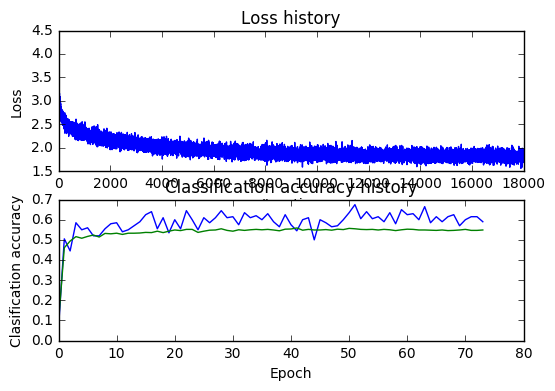

0.556
iteration 0 / 18000: loss 4.158616
iteration 100 / 18000: loss 2.751103
iteration 200 / 18000: loss 2.635402
iteration 300 / 18000: loss 2.651680
iteration 400 / 18000: loss 2.638480
iteration 500 / 18000: loss 2.487370
iteration 600 / 18000: loss 2.422485
iteration 700 / 18000: loss 2.375190
iteration 800 / 18000: loss 2.321331
iteration 900 / 18000: loss 2.452535
iteration 1000 / 18000: loss 2.291561
iteration 1100 / 18000: loss 2.323771
iteration 1200 / 18000: loss 2.257612
iteration 1300 / 18000: loss 2.284731
iteration 1400 / 18000: loss 2.410863
iteration 1500 / 18000: loss 2.376937
iteration 1600 / 18000: loss 2.203942
iteration 1700 / 18000: loss 2.157570
iteration 1800 / 18000: loss 2.287513
iteration 1900 / 18000: loss 2.291279
iteration 2000 / 18000: loss 2.230173
iteration 2100 / 18000: loss 2.310092
iteration 2200 / 18000: loss 2.145841
iteration 2300 / 18000: loss 2.107197
iteration 2400 / 18000: loss 2.217852
iteration 2500 / 18000: loss 2.253632
iteration 2600 / 1

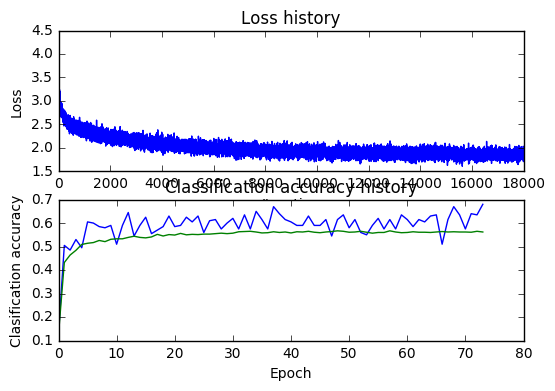

0.552
iteration 0 / 18000: loss 4.177522
iteration 100 / 18000: loss 2.914333
iteration 200 / 18000: loss 3.016228
iteration 300 / 18000: loss 2.689660
iteration 400 / 18000: loss 2.617932
iteration 500 / 18000: loss 2.583400
iteration 600 / 18000: loss 2.528136
iteration 700 / 18000: loss 2.540702
iteration 800 / 18000: loss 2.571902
iteration 900 / 18000: loss 2.403318
iteration 1000 / 18000: loss 2.530087
iteration 1100 / 18000: loss 2.592988
iteration 1200 / 18000: loss 2.491939
iteration 1300 / 18000: loss 2.321507
iteration 1400 / 18000: loss 2.342292
iteration 1500 / 18000: loss 2.308805
iteration 1600 / 18000: loss 2.349113
iteration 1700 / 18000: loss 2.472782
iteration 1800 / 18000: loss 2.294377
iteration 1900 / 18000: loss 2.429138
iteration 2000 / 18000: loss 2.320989
iteration 2100 / 18000: loss 2.252935
iteration 2200 / 18000: loss 2.346454
iteration 2300 / 18000: loss 2.355656
iteration 2400 / 18000: loss 2.326277
iteration 2500 / 18000: loss 2.300963
iteration 2600 / 1

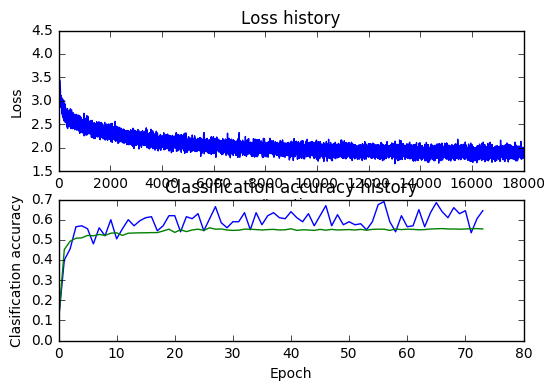

0.553
iteration 0 / 18000: loss 4.337979
iteration 100 / 18000: loss 2.967860
iteration 200 / 18000: loss 2.893061
iteration 300 / 18000: loss 2.892183
iteration 400 / 18000: loss 2.924161
iteration 500 / 18000: loss 2.593657
iteration 600 / 18000: loss 2.601985
iteration 700 / 18000: loss 2.619745
iteration 800 / 18000: loss 2.635892
iteration 900 / 18000: loss 2.506856
iteration 1000 / 18000: loss 2.639485
iteration 1100 / 18000: loss 2.558720
iteration 1200 / 18000: loss 2.506672
iteration 1300 / 18000: loss 2.542810
iteration 1400 / 18000: loss 2.454606
iteration 1500 / 18000: loss 2.397140
iteration 1600 / 18000: loss 2.339414
iteration 1700 / 18000: loss 2.398166
iteration 1800 / 18000: loss 2.468210
iteration 1900 / 18000: loss 2.374165
iteration 2000 / 18000: loss 2.322307
iteration 2100 / 18000: loss 2.259458
iteration 2200 / 18000: loss 2.365391
iteration 2300 / 18000: loss 2.500010
iteration 2400 / 18000: loss 2.302033
iteration 2500 / 18000: loss 2.282360
iteration 2600 / 1

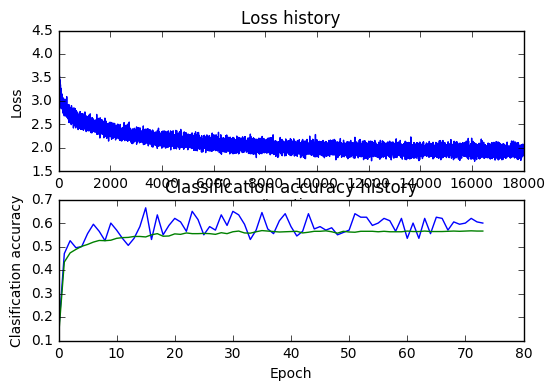

0.552
iteration 0 / 18000: loss 4.314834
iteration 100 / 18000: loss 3.205413
iteration 200 / 18000: loss 3.078980
iteration 300 / 18000: loss 2.889105
iteration 400 / 18000: loss 3.008328
iteration 500 / 18000: loss 2.690030
iteration 600 / 18000: loss 2.771917
iteration 700 / 18000: loss 2.635439
iteration 800 / 18000: loss 2.726472
iteration 900 / 18000: loss 2.717000
iteration 1000 / 18000: loss 2.753444
iteration 1100 / 18000: loss 2.480784
iteration 1200 / 18000: loss 2.611847
iteration 1300 / 18000: loss 2.550664
iteration 1400 / 18000: loss 2.472054
iteration 1500 / 18000: loss 2.608612
iteration 1600 / 18000: loss 2.535201
iteration 1700 / 18000: loss 2.509442
iteration 1800 / 18000: loss 2.500711
iteration 1900 / 18000: loss 2.485260
iteration 2000 / 18000: loss 2.500165
iteration 2100 / 18000: loss 2.406356
iteration 2200 / 18000: loss 2.529933
iteration 2300 / 18000: loss 2.484721
iteration 2400 / 18000: loss 2.441067
iteration 2500 / 18000: loss 2.352923
iteration 2600 / 1

cs231n/classifiers/neural_net.py:106: RuntimeWarning: overflow encountered in exp
  data_loss=np.sum(np.log(np.exp(scores).sum(axis=1)) )-np.sum(scores[np.arange(N),y])
cs231n/classifiers/neural_net.py:112: RuntimeWarning: overflow encountered in exp
  dscores=np.exp(scores)/(np.sum(np.exp(scores),axis=1).reshape(-1,1))#注意分母 !important 注意分母的形状
cs231n/classifiers/neural_net.py:112: RuntimeWarning: invalid value encountered in divide
  dscores=np.exp(scores)/(np.sum(np.exp(scores),axis=1).reshape(-1,1))#注意分母 !important 注意分母的形状
cs231n/classifiers/neural_net.py:83: RuntimeWarning: invalid value encountered in less
  index_relu=(z1<0)


iteration 13200 / 18000: loss nan


cs231n/classifiers/neural_net.py:255: RuntimeWarning: invalid value encountered in less
  index_relu=(z1<0)


iteration 13300 / 18000: loss nan
iteration 13400 / 18000: loss nan
iteration 13500 / 18000: loss nan
iteration 13600 / 18000: loss nan
iteration 13700 / 18000: loss nan
iteration 13800 / 18000: loss nan
iteration 13900 / 18000: loss nan
iteration 14000 / 18000: loss nan
iteration 14100 / 18000: loss nan
iteration 14200 / 18000: loss nan
iteration 14300 / 18000: loss nan
iteration 14400 / 18000: loss nan
iteration 14500 / 18000: loss nan
iteration 14600 / 18000: loss nan
iteration 14700 / 18000: loss nan
iteration 14800 / 18000: loss nan
iteration 14900 / 18000: loss nan
iteration 15000 / 18000: loss nan
iteration 15100 / 18000: loss nan
iteration 15200 / 18000: loss nan
iteration 15300 / 18000: loss nan
iteration 15400 / 18000: loss nan
iteration 15500 / 18000: loss nan
iteration 15600 / 18000: loss nan
iteration 15700 / 18000: loss nan
iteration 15800 / 18000: loss nan
iteration 15900 / 18000: loss nan
iteration 16000 / 18000: loss nan
iteration 16100 / 18000: loss nan
iteration 1620

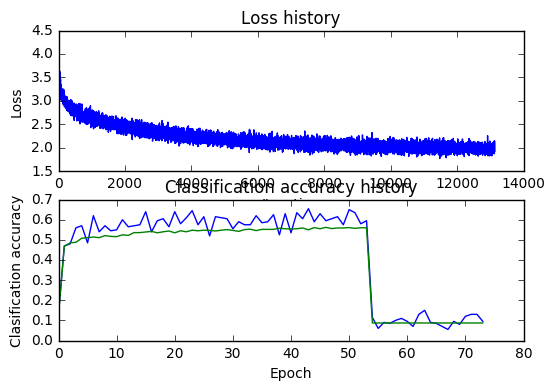

0.103
iteration 0 / 18000: loss 4.756565
iteration 100 / 18000: loss 3.359073
iteration 200 / 18000: loss 2.961170
iteration 300 / 18000: loss 2.898418
iteration 400 / 18000: loss 2.850395
iteration 500 / 18000: loss 2.854705
iteration 600 / 18000: loss 2.830762
iteration 700 / 18000: loss 2.837180
iteration 800 / 18000: loss 2.645781
iteration 900 / 18000: loss 2.680291
iteration 1000 / 18000: loss 2.778578
iteration 1100 / 18000: loss 2.657114
iteration 1200 / 18000: loss 2.786921
iteration 1300 / 18000: loss 2.612297
iteration 1400 / 18000: loss 2.736304
iteration 1500 / 18000: loss 2.575907
iteration 1600 / 18000: loss 2.501664
iteration 1700 / 18000: loss 2.724799
iteration 1800 / 18000: loss 2.587233
iteration 1900 / 18000: loss 2.511044
iteration 2000 / 18000: loss 2.531676
iteration 2100 / 18000: loss 2.400602
iteration 2200 / 18000: loss 2.464904
iteration 2300 / 18000: loss 2.494246
iteration 2400 / 18000: loss 2.428224
iteration 2500 / 18000: loss 2.508679
iteration 2600 / 1

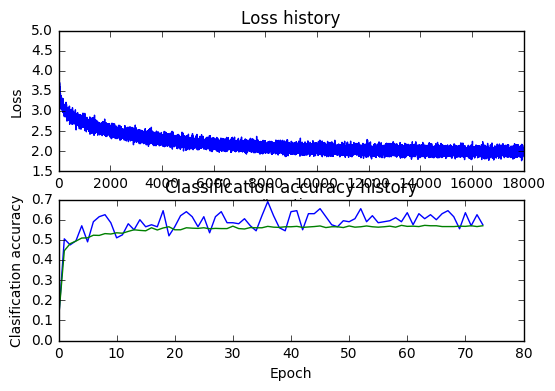

0.552
iteration 0 / 18000: loss 4.948620
iteration 100 / 18000: loss 3.250702
iteration 200 / 18000: loss 2.973824
iteration 300 / 18000: loss 2.973688
iteration 400 / 18000: loss 2.975545
iteration 500 / 18000: loss 2.874442
iteration 600 / 18000: loss 2.926026
iteration 700 / 18000: loss 2.933899
iteration 800 / 18000: loss 2.810333
iteration 900 / 18000: loss 2.763774
iteration 1000 / 18000: loss 2.785825
iteration 1100 / 18000: loss 2.751289
iteration 1200 / 18000: loss 2.636538
iteration 1300 / 18000: loss 2.700490
iteration 1400 / 18000: loss 2.674939
iteration 1500 / 18000: loss 2.758488
iteration 1600 / 18000: loss 2.595119
iteration 1700 / 18000: loss 2.695716
iteration 1800 / 18000: loss 2.681871
iteration 1900 / 18000: loss 2.612754
iteration 2000 / 18000: loss 2.521601
iteration 2100 / 18000: loss 2.565034
iteration 2200 / 18000: loss 2.474926
iteration 2300 / 18000: loss 2.501144
iteration 2400 / 18000: loss 2.505856
iteration 2500 / 18000: loss 2.606826
iteration 2600 / 1

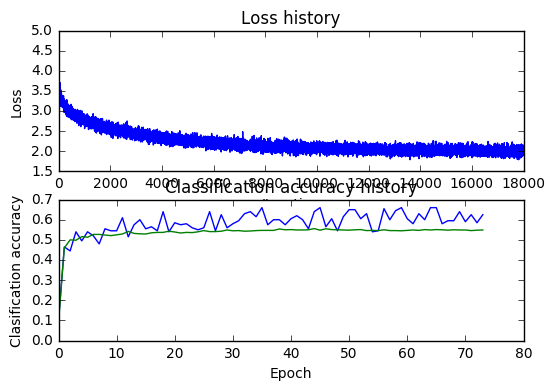

0.549
iteration 0 / 18000: loss 4.622723
iteration 100 / 18000: loss 3.493750
iteration 200 / 18000: loss 3.289470
iteration 300 / 18000: loss 3.161788
iteration 400 / 18000: loss 2.945686
iteration 500 / 18000: loss 3.068330
iteration 600 / 18000: loss 2.996788
iteration 700 / 18000: loss 2.868240
iteration 800 / 18000: loss 2.994842
iteration 900 / 18000: loss 2.861470
iteration 1000 / 18000: loss 2.902545
iteration 1100 / 18000: loss 2.800857
iteration 1200 / 18000: loss 2.976754
iteration 1300 / 18000: loss 2.829849
iteration 1400 / 18000: loss 2.812404
iteration 1500 / 18000: loss 2.749408
iteration 1600 / 18000: loss 2.719548
iteration 1700 / 18000: loss 2.717133
iteration 1800 / 18000: loss 2.699121
iteration 1900 / 18000: loss 2.720679
iteration 2000 / 18000: loss 2.645692
iteration 2100 / 18000: loss 2.586420
iteration 2200 / 18000: loss 2.550479
iteration 2300 / 18000: loss 2.561935
iteration 2400 / 18000: loss 2.553549
iteration 2500 / 18000: loss 2.590067
iteration 2600 / 1

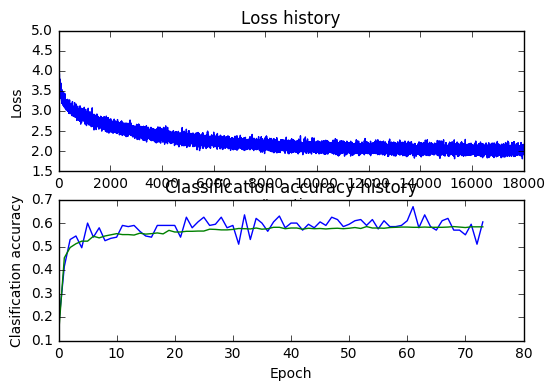

0.553
iteration 0 / 18000: loss 4.916114
iteration 100 / 18000: loss 3.388058
iteration 200 / 18000: loss 3.351374
iteration 300 / 18000: loss 3.273008
iteration 400 / 18000: loss 3.078635
iteration 500 / 18000: loss 3.131014
iteration 600 / 18000: loss 3.020871
iteration 700 / 18000: loss 3.047537
iteration 800 / 18000: loss 3.058953
iteration 900 / 18000: loss 2.928900
iteration 1000 / 18000: loss 3.039545
iteration 1100 / 18000: loss 2.831586
iteration 1200 / 18000: loss 2.797758
iteration 1300 / 18000: loss 2.810350
iteration 1400 / 18000: loss 2.855753
iteration 1500 / 18000: loss 2.763967
iteration 1600 / 18000: loss 2.754278
iteration 1700 / 18000: loss 2.723524
iteration 1800 / 18000: loss 2.687124
iteration 1900 / 18000: loss 2.819122
iteration 2000 / 18000: loss 2.582799
iteration 2100 / 18000: loss 2.813532
iteration 2200 / 18000: loss 2.560467
iteration 2300 / 18000: loss 2.765734
iteration 2400 / 18000: loss 2.574927
iteration 2500 / 18000: loss 2.605414
iteration 2600 / 1

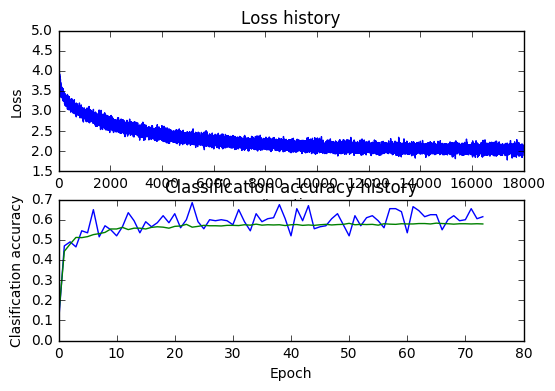

0.541
iteration 0 / 18000: loss 4.860998
iteration 100 / 18000: loss 3.621317
iteration 200 / 18000: loss 3.368839
iteration 300 / 18000: loss 3.402819
iteration 400 / 18000: loss 3.277416
iteration 500 / 18000: loss 3.159011
iteration 600 / 18000: loss 3.212309
iteration 700 / 18000: loss 3.099597
iteration 800 / 18000: loss 3.089109
iteration 900 / 18000: loss 2.993180
iteration 1000 / 18000: loss 3.014355
iteration 1100 / 18000: loss 2.960470
iteration 1200 / 18000: loss 3.096962
iteration 1300 / 18000: loss 3.118092
iteration 1400 / 18000: loss 2.983491
iteration 1500 / 18000: loss 2.826548
iteration 1600 / 18000: loss 2.972913
iteration 1700 / 18000: loss 2.718839
iteration 1800 / 18000: loss 2.730192
iteration 1900 / 18000: loss 2.696300
iteration 2000 / 18000: loss 2.648494
iteration 2100 / 18000: loss 2.875452
iteration 2200 / 18000: loss 2.640412
iteration 2300 / 18000: loss 2.603326
iteration 2400 / 18000: loss 2.715967
iteration 2500 / 18000: loss 2.811761
iteration 2600 / 1

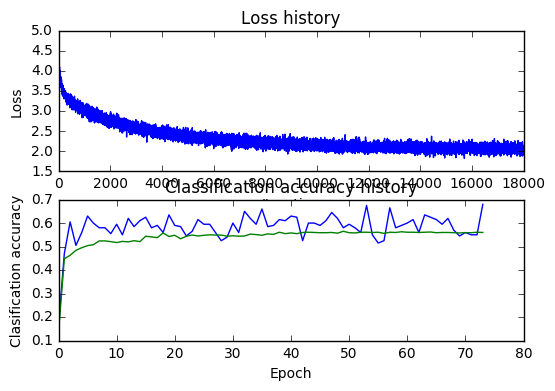

0.556
iteration 0 / 18000: loss 5.334158
iteration 100 / 18000: loss 3.765209
iteration 200 / 18000: loss 3.399995
iteration 300 / 18000: loss 3.371346
iteration 400 / 18000: loss 3.346629
iteration 500 / 18000: loss 3.237281
iteration 600 / 18000: loss 3.280164
iteration 700 / 18000: loss 3.267733
iteration 800 / 18000: loss 2.992841
iteration 900 / 18000: loss 3.202999
iteration 1000 / 18000: loss 3.261155
iteration 1100 / 18000: loss 2.891596
iteration 1200 / 18000: loss 2.978877
iteration 1300 / 18000: loss 2.932709
iteration 1400 / 18000: loss 2.944191
iteration 1500 / 18000: loss 2.863534
iteration 1600 / 18000: loss 2.991655
iteration 1700 / 18000: loss 2.872831
iteration 1800 / 18000: loss 2.896959
iteration 1900 / 18000: loss 2.791849
iteration 2000 / 18000: loss 2.795187
iteration 2100 / 18000: loss 2.770966
iteration 2200 / 18000: loss 2.626138
iteration 2300 / 18000: loss 2.778004
iteration 2400 / 18000: loss 2.864874
iteration 2500 / 18000: loss 2.666113
iteration 2600 / 1

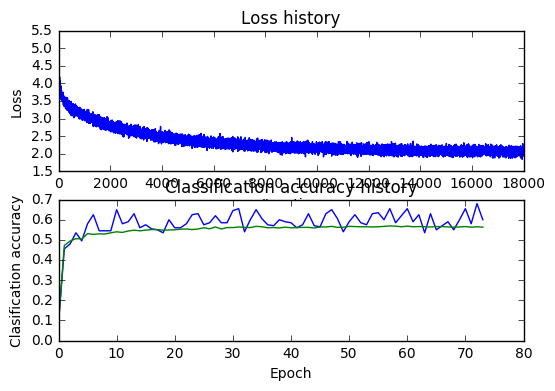

0.549
iteration 0 / 18000: loss 5.097263
iteration 100 / 18000: loss 3.724117
iteration 200 / 18000: loss 3.605764
iteration 300 / 18000: loss 3.581987
iteration 400 / 18000: loss 3.522983
iteration 500 / 18000: loss 3.380735
iteration 600 / 18000: loss 3.284196
iteration 700 / 18000: loss 3.413147
iteration 800 / 18000: loss 3.301671
iteration 900 / 18000: loss 3.215678
iteration 1000 / 18000: loss 3.109935
iteration 1100 / 18000: loss 2.980967
iteration 1200 / 18000: loss 3.079771
iteration 1300 / 18000: loss 3.009016
iteration 1400 / 18000: loss 2.983710
iteration 1500 / 18000: loss 3.057729
iteration 1600 / 18000: loss 2.929883
iteration 1700 / 18000: loss 2.940582
iteration 1800 / 18000: loss 2.860703
iteration 1900 / 18000: loss 2.854978
iteration 2000 / 18000: loss 2.899023
iteration 2100 / 18000: loss 2.839273
iteration 2200 / 18000: loss 2.766787
iteration 2300 / 18000: loss 2.634324
iteration 2400 / 18000: loss 2.721286
iteration 2500 / 18000: loss 2.772152
iteration 2600 / 1

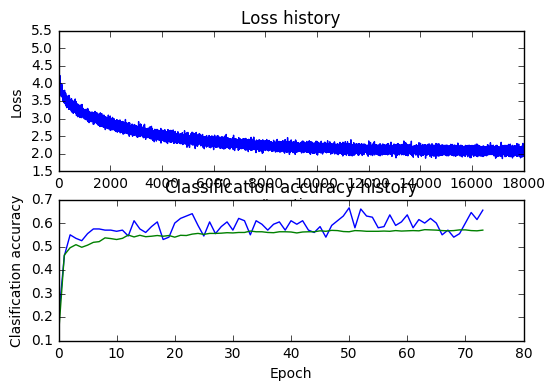

0.551
iteration 0 / 18000: loss 5.387809
iteration 100 / 18000: loss 3.935415
iteration 200 / 18000: loss 3.829084
iteration 300 / 18000: loss 3.709846
iteration 400 / 18000: loss 3.586444
iteration 500 / 18000: loss 3.569487
iteration 600 / 18000: loss 3.364053
iteration 700 / 18000: loss 3.366480
iteration 800 / 18000: loss 3.186579
iteration 900 / 18000: loss 3.253731
iteration 1000 / 18000: loss 3.197710
iteration 1100 / 18000: loss 3.148620
iteration 1200 / 18000: loss 3.160984
iteration 1300 / 18000: loss 3.159793
iteration 1400 / 18000: loss 3.060576
iteration 1500 / 18000: loss 3.129034
iteration 1600 / 18000: loss 3.063834
iteration 1700 / 18000: loss 3.097906
iteration 1800 / 18000: loss 2.953307
iteration 1900 / 18000: loss 3.040757
iteration 2000 / 18000: loss 2.865234
iteration 2100 / 18000: loss 2.781242
iteration 2200 / 18000: loss 2.775925
iteration 2300 / 18000: loss 2.885900
iteration 2400 / 18000: loss 2.864587
iteration 2500 / 18000: loss 2.815007
iteration 2600 / 1

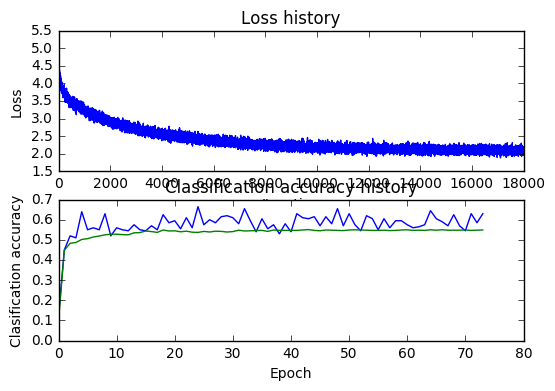

0.536
iteration 0 / 18000: loss 5.274449
iteration 100 / 18000: loss 3.920986
iteration 200 / 18000: loss 3.724564
iteration 300 / 18000: loss 3.617423
iteration 400 / 18000: loss 3.620851
iteration 500 / 18000: loss 3.662578
iteration 600 / 18000: loss 3.561181
iteration 700 / 18000: loss 3.408984
iteration 800 / 18000: loss 3.395082
iteration 900 / 18000: loss 3.291186
iteration 1000 / 18000: loss 3.256044
iteration 1100 / 18000: loss 3.212227
iteration 1200 / 18000: loss 3.193769
iteration 1300 / 18000: loss 3.085614
iteration 1400 / 18000: loss 3.272112
iteration 1500 / 18000: loss 3.074825
iteration 1600 / 18000: loss 2.979336
iteration 1700 / 18000: loss 2.999706
iteration 1800 / 18000: loss 2.982428
iteration 1900 / 18000: loss 2.983168
iteration 2000 / 18000: loss 2.923616
iteration 2100 / 18000: loss 2.910575
iteration 2200 / 18000: loss 2.905341
iteration 2300 / 18000: loss 2.714224
iteration 2400 / 18000: loss 2.856916
iteration 2500 / 18000: loss 2.900593
iteration 2600 / 1

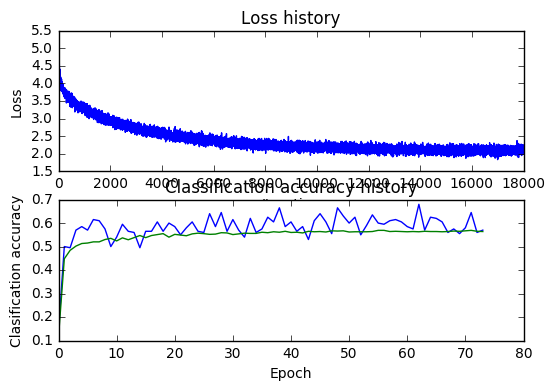

0.549
iteration 0 / 18000: loss 5.769065
iteration 100 / 18000: loss 4.174624
iteration 200 / 18000: loss 3.969272
iteration 300 / 18000: loss 3.775792
iteration 400 / 18000: loss 3.705231
iteration 500 / 18000: loss 3.757710
iteration 600 / 18000: loss 3.533806
iteration 700 / 18000: loss 3.495976
iteration 800 / 18000: loss 3.441419
iteration 900 / 18000: loss 3.427580
iteration 1000 / 18000: loss 3.435410
iteration 1100 / 18000: loss 3.269151
iteration 1200 / 18000: loss 3.247582
iteration 1300 / 18000: loss 3.168351
iteration 1400 / 18000: loss 3.140123
iteration 1500 / 18000: loss 3.170907
iteration 1600 / 18000: loss 2.980444
iteration 1700 / 18000: loss 3.084968
iteration 1800 / 18000: loss 3.148904
iteration 1900 / 18000: loss 2.965792
iteration 2000 / 18000: loss 2.970278
iteration 2100 / 18000: loss 2.936037
iteration 2200 / 18000: loss 3.058361
iteration 2300 / 18000: loss 2.899646
iteration 2400 / 18000: loss 2.829550
iteration 2500 / 18000: loss 2.798313
iteration 2600 / 1

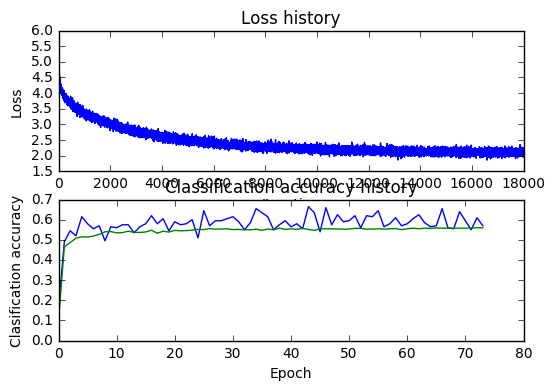

0.549
iteration 0 / 18000: loss 5.534096
iteration 100 / 18000: loss 4.357892
iteration 200 / 18000: loss 4.062448
iteration 300 / 18000: loss 3.841154
iteration 400 / 18000: loss 3.770536
iteration 500 / 18000: loss 3.567771
iteration 600 / 18000: loss 3.699926
iteration 700 / 18000: loss 3.556388
iteration 800 / 18000: loss 3.539515
iteration 900 / 18000: loss 3.501168
iteration 1000 / 18000: loss 3.393972
iteration 1100 / 18000: loss 3.482394
iteration 1200 / 18000: loss 3.296621
iteration 1300 / 18000: loss 3.240207
iteration 1400 / 18000: loss 3.321621
iteration 1500 / 18000: loss 3.247035
iteration 1600 / 18000: loss 3.067949
iteration 1700 / 18000: loss 3.134870
iteration 1800 / 18000: loss 3.068944
iteration 1900 / 18000: loss 3.060427
iteration 2000 / 18000: loss 3.006798
iteration 2100 / 18000: loss 3.074064
iteration 2200 / 18000: loss 2.942581
iteration 2300 / 18000: loss 3.059770
iteration 2400 / 18000: loss 2.887888
iteration 2500 / 18000: loss 3.048654
iteration 2600 / 1

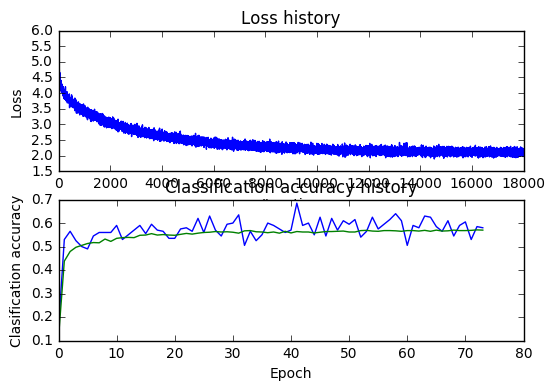

0.543
iteration 0 / 18000: loss 5.811141
iteration 100 / 18000: loss 4.253996
iteration 200 / 18000: loss 4.160272
iteration 300 / 18000: loss 3.995143
iteration 400 / 18000: loss 3.919873
iteration 500 / 18000: loss 3.787967
iteration 600 / 18000: loss 3.722304
iteration 700 / 18000: loss 3.655723
iteration 800 / 18000: loss 3.603214
iteration 900 / 18000: loss 3.629102
iteration 1000 / 18000: loss 3.539066
iteration 1100 / 18000: loss 3.443009
iteration 1200 / 18000: loss 3.411705
iteration 1300 / 18000: loss 3.416743
iteration 1400 / 18000: loss 3.257072
iteration 1500 / 18000: loss 3.144925
iteration 1600 / 18000: loss 3.225948
iteration 1700 / 18000: loss 3.185532
iteration 1800 / 18000: loss 3.185290
iteration 1900 / 18000: loss 3.084165
iteration 2000 / 18000: loss 3.201403
iteration 2100 / 18000: loss 2.965598
iteration 2200 / 18000: loss 3.046099
iteration 2300 / 18000: loss 2.853692
iteration 2400 / 18000: loss 3.114732
iteration 2500 / 18000: loss 2.899031
iteration 2600 / 1

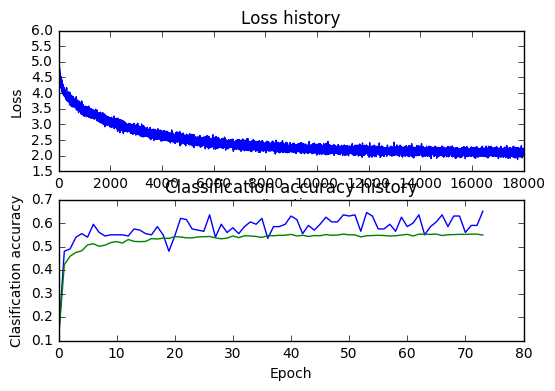

0.562
iteration 0 / 18000: loss 5.819445
iteration 100 / 18000: loss 4.391382
iteration 200 / 18000: loss 4.197269
iteration 300 / 18000: loss 4.202707
iteration 400 / 18000: loss 3.924808
iteration 500 / 18000: loss 3.795959
iteration 600 / 18000: loss 3.751760
iteration 700 / 18000: loss 3.880688
iteration 800 / 18000: loss 3.580555
iteration 900 / 18000: loss 3.495531
iteration 1000 / 18000: loss 3.643495
iteration 1100 / 18000: loss 3.471051
iteration 1200 / 18000: loss 3.289056
iteration 1300 / 18000: loss 3.427798
iteration 1400 / 18000: loss 3.400003
iteration 1500 / 18000: loss 3.287442
iteration 1600 / 18000: loss 3.301101
iteration 1700 / 18000: loss 3.265138
iteration 1800 / 18000: loss 3.199350
iteration 1900 / 18000: loss 3.195057
iteration 2000 / 18000: loss 3.203407
iteration 2100 / 18000: loss 3.098549
iteration 2200 / 18000: loss 2.978159
iteration 2300 / 18000: loss 3.075307
iteration 2400 / 18000: loss 2.966882
iteration 2500 / 18000: loss 2.915234
iteration 2600 / 1

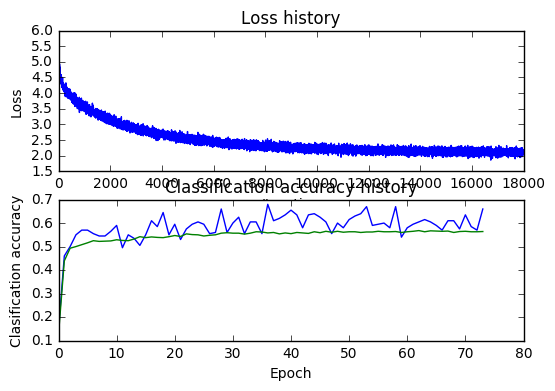

0.543
iteration 0 / 18000: loss 5.992972
iteration 100 / 18000: loss 4.651917
iteration 200 / 18000: loss 4.273237
iteration 300 / 18000: loss 4.133569
iteration 400 / 18000: loss 4.069063
iteration 500 / 18000: loss 3.895397
iteration 600 / 18000: loss 3.894672
iteration 700 / 18000: loss 3.837837
iteration 800 / 18000: loss 3.814680
iteration 900 / 18000: loss 3.684896
iteration 1000 / 18000: loss 3.669054
iteration 1100 / 18000: loss 3.496789
iteration 1200 / 18000: loss 3.520626
iteration 1300 / 18000: loss 3.444091
iteration 1400 / 18000: loss 3.572596
iteration 1500 / 18000: loss 3.474520
iteration 1600 / 18000: loss 3.326320
iteration 1700 / 18000: loss 3.368443
iteration 1800 / 18000: loss 3.349135
iteration 1900 / 18000: loss 3.227117
iteration 2000 / 18000: loss 3.139096
iteration 2100 / 18000: loss 3.142274
iteration 2200 / 18000: loss 3.154602
iteration 2300 / 18000: loss 3.112151
iteration 2400 / 18000: loss 3.087658
iteration 2500 / 18000: loss 3.084820
iteration 2600 / 1

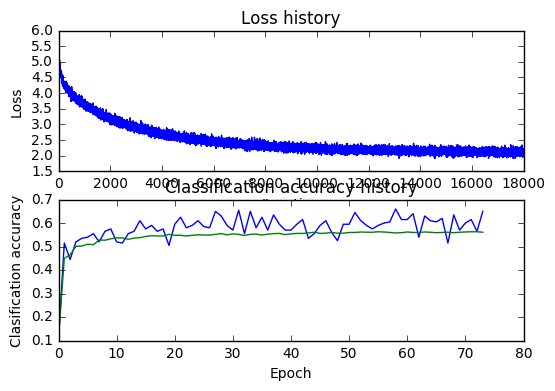

0.549
iteration 0 / 18000: loss 6.120647
iteration 100 / 18000: loss 4.704248
iteration 200 / 18000: loss 4.409970
iteration 300 / 18000: loss 4.312831
iteration 400 / 18000: loss 3.988392
iteration 500 / 18000: loss 4.026413
iteration 600 / 18000: loss 3.983871
iteration 700 / 18000: loss 3.793482
iteration 800 / 18000: loss 3.856954
iteration 900 / 18000: loss 3.910703
iteration 1000 / 18000: loss 3.707728
iteration 1100 / 18000: loss 3.688822
iteration 1200 / 18000: loss 3.706802
iteration 1300 / 18000: loss 3.396749
iteration 1400 / 18000: loss 3.421494
iteration 1500 / 18000: loss 3.343849
iteration 1600 / 18000: loss 3.463795
iteration 1700 / 18000: loss 3.263364
iteration 1800 / 18000: loss 3.221327
iteration 1900 / 18000: loss 3.250803
iteration 2000 / 18000: loss 3.275132
iteration 2100 / 18000: loss 3.099606
iteration 2200 / 18000: loss 3.088237
iteration 2300 / 18000: loss 3.165193
iteration 2400 / 18000: loss 2.957442
iteration 2500 / 18000: loss 3.069111
iteration 2600 / 1

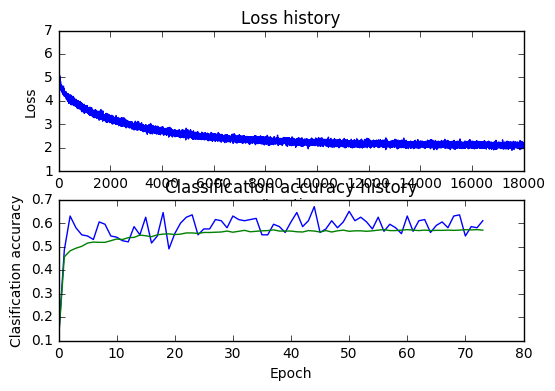

0.531
iteration 0 / 18000: loss 6.151244
iteration 100 / 18000: loss 4.697164
iteration 200 / 18000: loss 4.484485
iteration 300 / 18000: loss 4.269883
iteration 400 / 18000: loss 4.210233
iteration 500 / 18000: loss 4.190466
iteration 600 / 18000: loss 4.016370
iteration 700 / 18000: loss 3.982383
iteration 800 / 18000: loss 3.794999
iteration 900 / 18000: loss 3.951345
iteration 1000 / 18000: loss 3.780498
iteration 1100 / 18000: loss 3.671347
iteration 1200 / 18000: loss 3.624172
iteration 1300 / 18000: loss 3.526680
iteration 1400 / 18000: loss 3.455534
iteration 1500 / 18000: loss 3.435579
iteration 1600 / 18000: loss 3.459842
iteration 1700 / 18000: loss 3.399757
iteration 1800 / 18000: loss 3.494346
iteration 1900 / 18000: loss 3.214165
iteration 2000 / 18000: loss 3.245914
iteration 2100 / 18000: loss 3.279150
iteration 2200 / 18000: loss 3.154002
iteration 2300 / 18000: loss 3.108866
iteration 2400 / 18000: loss 3.173105
iteration 2500 / 18000: loss 3.092515
iteration 2600 / 1

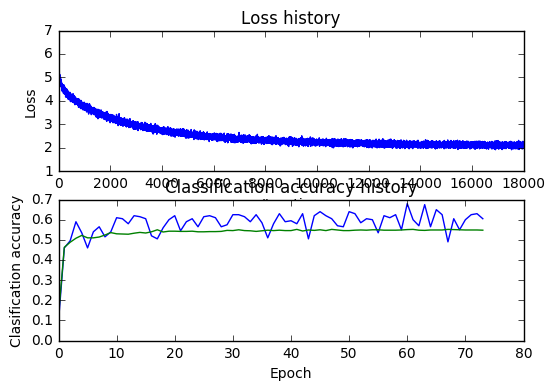

0.551
iteration 0 / 18000: loss 6.352000
iteration 100 / 18000: loss 4.824850
iteration 200 / 18000: loss 4.541308
iteration 300 / 18000: loss 4.391453
iteration 400 / 18000: loss 4.171485
iteration 500 / 18000: loss 4.196980
iteration 600 / 18000: loss 4.113449
iteration 700 / 18000: loss 4.039478
iteration 800 / 18000: loss 3.974903
iteration 900 / 18000: loss 3.825085
iteration 1000 / 18000: loss 3.823406
iteration 1100 / 18000: loss 3.777364
iteration 1200 / 18000: loss 3.622941
iteration 1300 / 18000: loss 3.594111
iteration 1400 / 18000: loss 3.458109
iteration 1500 / 18000: loss 3.544306
iteration 1600 / 18000: loss 3.514372
iteration 1700 / 18000: loss 3.518955
iteration 1800 / 18000: loss 3.297510
iteration 1900 / 18000: loss 3.345008
iteration 2000 / 18000: loss 3.297813
iteration 2100 / 18000: loss 3.246237
iteration 2200 / 18000: loss 3.206877
iteration 2300 / 18000: loss 3.235258
iteration 2400 / 18000: loss 3.079808
iteration 2500 / 18000: loss 3.110197
iteration 2600 / 1

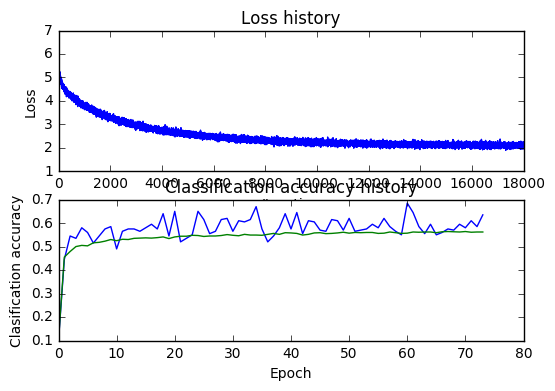

0.546
iteration 0 / 18000: loss 6.225939
iteration 100 / 18000: loss 4.896728
iteration 200 / 18000: loss 4.691141
iteration 300 / 18000: loss 4.466103
iteration 400 / 18000: loss 4.362537
iteration 500 / 18000: loss 4.230798
iteration 600 / 18000: loss 4.170986
iteration 700 / 18000: loss 4.029911
iteration 800 / 18000: loss 4.071066
iteration 900 / 18000: loss 3.916593
iteration 1000 / 18000: loss 3.879119
iteration 1100 / 18000: loss 3.823184
iteration 1200 / 18000: loss 3.684872
iteration 1300 / 18000: loss 3.742541
iteration 1400 / 18000: loss 3.557720
iteration 1500 / 18000: loss 3.508149
iteration 1600 / 18000: loss 3.402173
iteration 1700 / 18000: loss 3.358089
iteration 1800 / 18000: loss 3.329579
iteration 1900 / 18000: loss 3.453139
iteration 2000 / 18000: loss 3.392058
iteration 2100 / 18000: loss 3.339940
iteration 2200 / 18000: loss 3.200029
iteration 2300 / 18000: loss 3.220312
iteration 2400 / 18000: loss 3.211916
iteration 2500 / 18000: loss 3.184614
iteration 2600 / 1

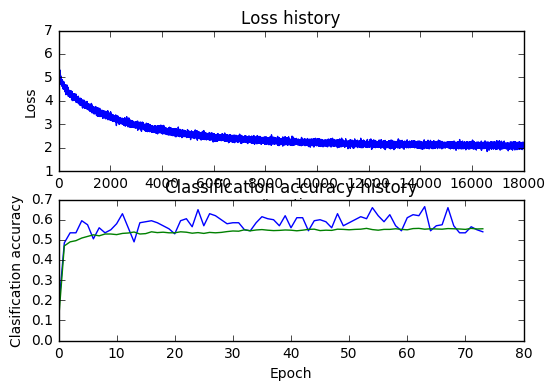

0.539
iteration 0 / 18000: loss 6.399989
iteration 100 / 18000: loss 4.930980
iteration 200 / 18000: loss 4.783361
iteration 300 / 18000: loss 4.511646
iteration 400 / 18000: loss 4.626838
iteration 500 / 18000: loss 4.392481
iteration 600 / 18000: loss 4.278966
iteration 700 / 18000: loss 4.148904
iteration 800 / 18000: loss 4.074324
iteration 900 / 18000: loss 3.912194
iteration 1000 / 18000: loss 3.875303
iteration 1100 / 18000: loss 3.919569
iteration 1200 / 18000: loss 3.834817
iteration 1300 / 18000: loss 3.782122
iteration 1400 / 18000: loss 3.685414
iteration 1500 / 18000: loss 3.616829
iteration 1600 / 18000: loss 3.524435
iteration 1700 / 18000: loss 3.549027
iteration 1800 / 18000: loss 3.367568
iteration 1900 / 18000: loss 3.387067
iteration 2000 / 18000: loss 3.431048
iteration 2100 / 18000: loss 3.239546
iteration 2200 / 18000: loss 3.375378
iteration 2300 / 18000: loss 3.224450
iteration 2400 / 18000: loss 3.446973
iteration 2500 / 18000: loss 3.153766
iteration 2600 / 1

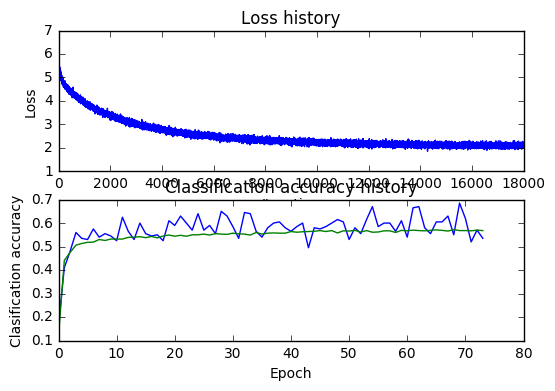

0.539
iteration 0 / 18000: loss 6.465259
iteration 100 / 18000: loss 5.259217
iteration 200 / 18000: loss 4.837450
iteration 300 / 18000: loss 4.686934
iteration 400 / 18000: loss 4.435419
iteration 500 / 18000: loss 4.454025
iteration 600 / 18000: loss 4.287515
iteration 700 / 18000: loss 4.176421
iteration 800 / 18000: loss 4.163488
iteration 900 / 18000: loss 4.124220
iteration 1000 / 18000: loss 4.053716
iteration 1100 / 18000: loss 3.973771
iteration 1200 / 18000: loss 3.865591
iteration 1300 / 18000: loss 3.779478
iteration 1400 / 18000: loss 3.752750
iteration 1500 / 18000: loss 3.449086
iteration 1600 / 18000: loss 3.609135
iteration 1700 / 18000: loss 3.537123
iteration 1800 / 18000: loss 3.391585
iteration 1900 / 18000: loss 3.454603
iteration 2000 / 18000: loss 3.454834
iteration 2100 / 18000: loss 3.411700
iteration 2200 / 18000: loss 3.410735
iteration 2300 / 18000: loss 3.112227
iteration 2400 / 18000: loss 3.267020
iteration 2500 / 18000: loss 3.173399
iteration 2600 / 1

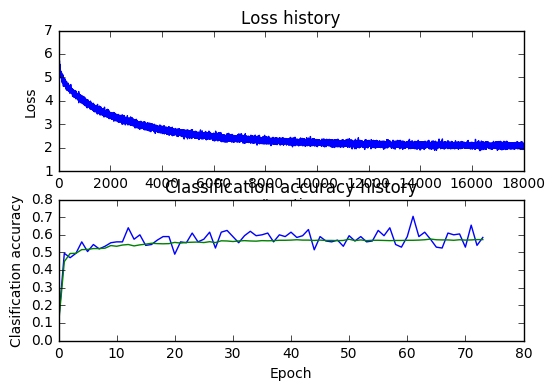

0.54
iteration 0 / 18000: loss 6.777085
iteration 100 / 18000: loss 5.323400
iteration 200 / 18000: loss 5.065882
iteration 300 / 18000: loss 4.711330
iteration 400 / 18000: loss 4.644331
iteration 500 / 18000: loss 4.437209
iteration 600 / 18000: loss 4.378401
iteration 700 / 18000: loss 4.331635
iteration 800 / 18000: loss 4.130246
iteration 900 / 18000: loss 4.041852
iteration 1000 / 18000: loss 4.077098
iteration 1100 / 18000: loss 3.924679
iteration 1200 / 18000: loss 3.910543
iteration 1300 / 18000: loss 3.742805
iteration 1400 / 18000: loss 3.640132
iteration 1500 / 18000: loss 3.759375
iteration 1600 / 18000: loss 3.516006
iteration 1700 / 18000: loss 3.493236
iteration 1800 / 18000: loss 3.485249
iteration 1900 / 18000: loss 3.456322
iteration 2000 / 18000: loss 3.432647
iteration 2100 / 18000: loss 3.421962
iteration 2200 / 18000: loss 3.332777
iteration 2300 / 18000: loss 3.304920
iteration 2400 / 18000: loss 3.198910
iteration 2500 / 18000: loss 3.205081
iteration 2600 / 18

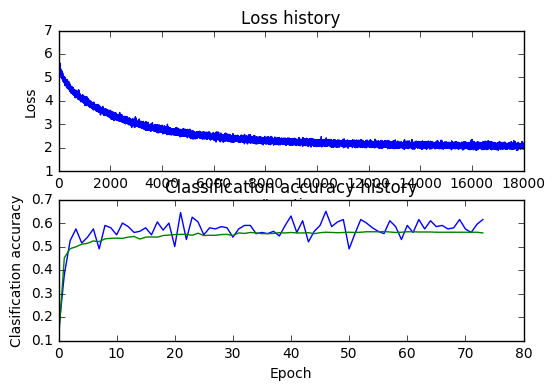

0.55
iteration 0 / 18000: loss 6.760867
iteration 100 / 18000: loss 5.281337
iteration 200 / 18000: loss 5.023314
iteration 300 / 18000: loss 4.836607
iteration 400 / 18000: loss 4.652222
iteration 500 / 18000: loss 4.547348
iteration 600 / 18000: loss 4.396093
iteration 700 / 18000: loss 4.287670
iteration 800 / 18000: loss 4.261454
iteration 900 / 18000: loss 4.167066
iteration 1000 / 18000: loss 3.997868
iteration 1100 / 18000: loss 4.024090
iteration 1200 / 18000: loss 3.881776
iteration 1300 / 18000: loss 3.871196
iteration 1400 / 18000: loss 3.723442
iteration 1500 / 18000: loss 3.672092
iteration 1600 / 18000: loss 3.703593
iteration 1700 / 18000: loss 3.613018
iteration 1800 / 18000: loss 3.515088
iteration 1900 / 18000: loss 3.478437
iteration 2000 / 18000: loss 3.349647
iteration 2100 / 18000: loss 3.429596
iteration 2200 / 18000: loss 3.434259
iteration 2300 / 18000: loss 3.230511
iteration 2400 / 18000: loss 3.188636
iteration 2500 / 18000: loss 3.199909
iteration 2600 / 18

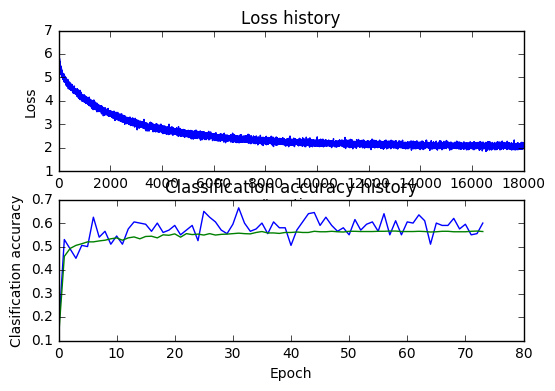

0.554
iteration 0 / 18000: loss 6.819772
iteration 100 / 18000: loss 5.333153
iteration 200 / 18000: loss 5.103107
iteration 300 / 18000: loss 4.883549
iteration 400 / 18000: loss 4.682568
iteration 500 / 18000: loss 4.695732
iteration 600 / 18000: loss 4.472811
iteration 700 / 18000: loss 4.514593
iteration 800 / 18000: loss 4.364030
iteration 900 / 18000: loss 4.235987
iteration 1000 / 18000: loss 4.185938
iteration 1100 / 18000: loss 3.986654
iteration 1200 / 18000: loss 3.948569
iteration 1300 / 18000: loss 3.998591
iteration 1400 / 18000: loss 3.870913
iteration 1500 / 18000: loss 3.792201
iteration 1600 / 18000: loss 3.757710
iteration 1700 / 18000: loss 3.645401
iteration 1800 / 18000: loss 3.568717
iteration 1900 / 18000: loss 3.494876
iteration 2000 / 18000: loss 3.545172
iteration 2100 / 18000: loss 3.481285
iteration 2200 / 18000: loss 3.401303
iteration 2300 / 18000: loss 3.302623
iteration 2400 / 18000: loss 3.273931
iteration 2500 / 18000: loss 3.311209
iteration 2600 / 1

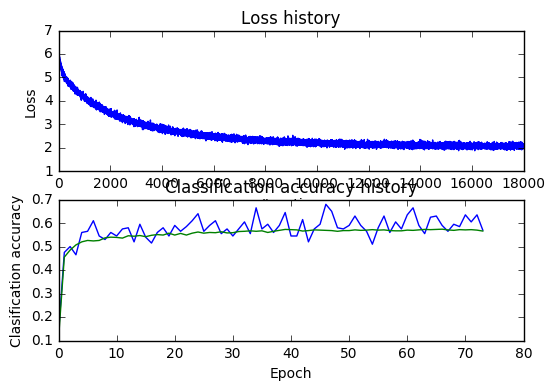

0.544
iteration 0 / 18000: loss 7.343086
iteration 100 / 18000: loss 5.581505
iteration 200 / 18000: loss 5.086975
iteration 300 / 18000: loss 5.104187
iteration 400 / 18000: loss 4.971471
iteration 500 / 18000: loss 4.717126
iteration 600 / 18000: loss 4.531900
iteration 700 / 18000: loss 4.434871
iteration 800 / 18000: loss 4.360582
iteration 900 / 18000: loss 4.405646
iteration 1000 / 18000: loss 4.105340
iteration 1100 / 18000: loss 3.974244
iteration 1200 / 18000: loss 4.090075
iteration 1300 / 18000: loss 3.946139
iteration 1400 / 18000: loss 3.969329
iteration 1500 / 18000: loss 3.705516
iteration 1600 / 18000: loss 3.698299
iteration 1700 / 18000: loss 3.677079
iteration 1800 / 18000: loss 3.546797
iteration 1900 / 18000: loss 3.650550
iteration 2000 / 18000: loss 3.491848
iteration 2100 / 18000: loss 3.479763
iteration 2200 / 18000: loss 3.428795
iteration 2300 / 18000: loss 3.363205
iteration 2400 / 18000: loss 3.301701
iteration 2500 / 18000: loss 3.415754
iteration 2600 / 1

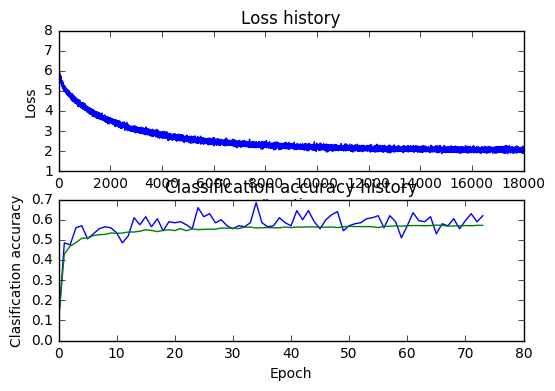

0.553
iteration 0 / 18000: loss 6.970711
iteration 100 / 18000: loss 5.702520
iteration 200 / 18000: loss 5.327752
iteration 300 / 18000: loss 5.039882
iteration 400 / 18000: loss 4.933456
iteration 500 / 18000: loss 4.720344
iteration 600 / 18000: loss 4.734873
iteration 700 / 18000: loss 4.559627
iteration 800 / 18000: loss 4.503635
iteration 900 / 18000: loss 4.319680
iteration 1000 / 18000: loss 4.335717
iteration 1100 / 18000: loss 4.111711
iteration 1200 / 18000: loss 4.130124
iteration 1300 / 18000: loss 3.937374
iteration 1400 / 18000: loss 3.952286
iteration 1500 / 18000: loss 3.711306
iteration 1600 / 18000: loss 3.686468
iteration 1700 / 18000: loss 3.762684
iteration 1800 / 18000: loss 3.636832
iteration 1900 / 18000: loss 3.542959
iteration 2000 / 18000: loss 3.589048
iteration 2100 / 18000: loss 3.518795
iteration 2200 / 18000: loss 3.438639
iteration 2300 / 18000: loss 3.442775
iteration 2400 / 18000: loss 3.375076
iteration 2500 / 18000: loss 3.336888
iteration 2600 / 1

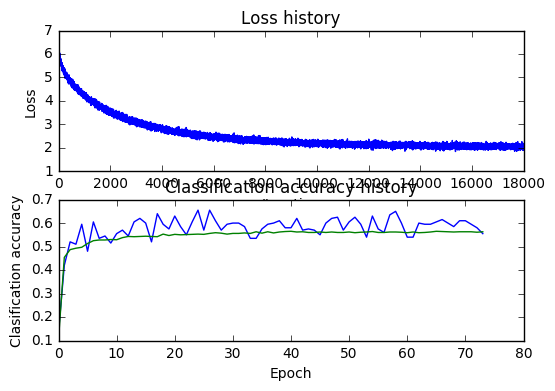

0.545
iteration 0 / 18000: loss 7.371891
iteration 100 / 18000: loss 5.789337
iteration 200 / 18000: loss 5.350489
iteration 300 / 18000: loss 5.240335
iteration 400 / 18000: loss 5.056852
iteration 500 / 18000: loss 4.946535
iteration 600 / 18000: loss 4.765121
iteration 700 / 18000: loss 4.603228
iteration 800 / 18000: loss 4.473338
iteration 900 / 18000: loss 4.361665
iteration 1000 / 18000: loss 4.356892
iteration 1100 / 18000: loss 4.178258
iteration 1200 / 18000: loss 4.139896
iteration 1300 / 18000: loss 3.954771
iteration 1400 / 18000: loss 3.991409
iteration 1500 / 18000: loss 3.884210
iteration 1600 / 18000: loss 3.831075
iteration 1700 / 18000: loss 3.782726
iteration 1800 / 18000: loss 3.919760
iteration 1900 / 18000: loss 3.679507
iteration 2000 / 18000: loss 3.664491
iteration 2100 / 18000: loss 3.469907
iteration 2200 / 18000: loss 3.389962
iteration 2300 / 18000: loss 3.278667
iteration 2400 / 18000: loss 3.328258
iteration 2500 / 18000: loss 3.295036
iteration 2600 / 1

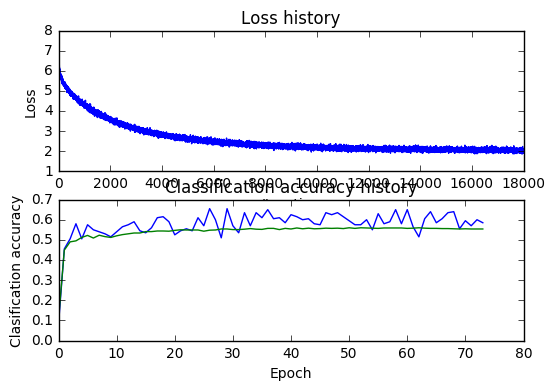

0.55
iteration 0 / 18000: loss 7.157862
iteration 100 / 18000: loss 5.743845
iteration 200 / 18000: loss 5.348745
iteration 300 / 18000: loss 5.148242
iteration 400 / 18000: loss 5.036656
iteration 500 / 18000: loss 4.871277
iteration 600 / 18000: loss 4.734256
iteration 700 / 18000: loss 4.720456
iteration 800 / 18000: loss 4.420674
iteration 900 / 18000: loss 4.374869
iteration 1000 / 18000: loss 4.341557
iteration 1100 / 18000: loss 4.210200
iteration 1200 / 18000: loss 4.164480
iteration 1300 / 18000: loss 4.049831
iteration 1400 / 18000: loss 3.816552
iteration 1500 / 18000: loss 3.777787
iteration 1600 / 18000: loss 3.770568
iteration 1700 / 18000: loss 3.773034
iteration 1800 / 18000: loss 3.653573
iteration 1900 / 18000: loss 3.593247
iteration 2000 / 18000: loss 3.587423
iteration 2100 / 18000: loss 3.496324
iteration 2200 / 18000: loss 3.594469
iteration 2300 / 18000: loss 3.415882
iteration 2400 / 18000: loss 3.424232
iteration 2500 / 18000: loss 3.335068
iteration 2600 / 18

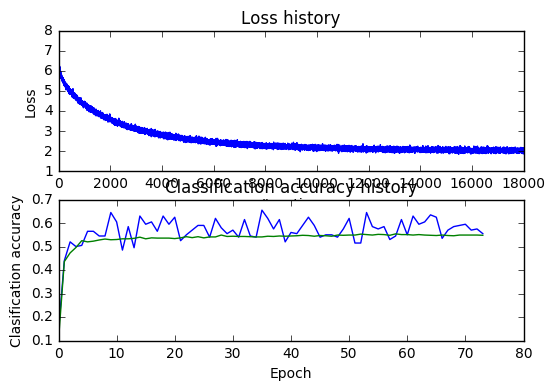

0.536
iteration 0 / 18000: loss 7.305917
iteration 100 / 18000: loss 5.999466
iteration 200 / 18000: loss 5.480287
iteration 300 / 18000: loss 5.302205
iteration 400 / 18000: loss 5.058756
iteration 500 / 18000: loss 5.076798
iteration 600 / 18000: loss 4.865960
iteration 700 / 18000: loss 4.675516
iteration 800 / 18000: loss 4.582415
iteration 900 / 18000: loss 4.513572
iteration 1000 / 18000: loss 4.376163
iteration 1100 / 18000: loss 4.209174
iteration 1200 / 18000: loss 4.127655
iteration 1300 / 18000: loss 4.184329
iteration 1400 / 18000: loss 4.008580
iteration 1500 / 18000: loss 3.900553
iteration 1600 / 18000: loss 3.923503
iteration 1700 / 18000: loss 3.704327
iteration 1800 / 18000: loss 3.684962
iteration 1900 / 18000: loss 3.681756
iteration 2000 / 18000: loss 3.532820
iteration 2100 / 18000: loss 3.470648
iteration 2200 / 18000: loss 3.589322
iteration 2300 / 18000: loss 3.318582
iteration 2400 / 18000: loss 3.461411
iteration 2500 / 18000: loss 3.362530
iteration 2600 / 1

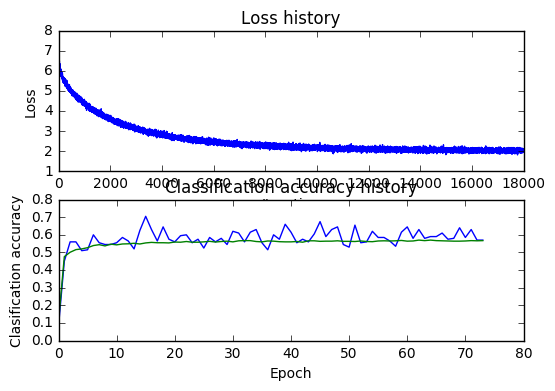

0.544
iteration 0 / 18000: loss 7.608059
iteration 100 / 18000: loss 5.946290
iteration 200 / 18000: loss 5.687718
iteration 300 / 18000: loss 5.467406
iteration 400 / 18000: loss 5.117697
iteration 500 / 18000: loss 4.946358
iteration 600 / 18000: loss 4.893352
iteration 700 / 18000: loss 4.722575
iteration 800 / 18000: loss 4.695122
iteration 900 / 18000: loss 4.489511
iteration 1000 / 18000: loss 4.378775
iteration 1100 / 18000: loss 4.299920
iteration 1200 / 18000: loss 4.158055
iteration 1300 / 18000: loss 4.100380
iteration 1400 / 18000: loss 4.046825
iteration 1500 / 18000: loss 3.960412
iteration 1600 / 18000: loss 3.842407
iteration 1700 / 18000: loss 3.769003
iteration 1800 / 18000: loss 3.706501
iteration 1900 / 18000: loss 3.648838
iteration 2000 / 18000: loss 3.617975
iteration 2100 / 18000: loss 3.602367
iteration 2200 / 18000: loss 3.530976
iteration 2300 / 18000: loss 3.365930
iteration 2400 / 18000: loss 3.396812
iteration 2500 / 18000: loss 3.311312
iteration 2600 / 1

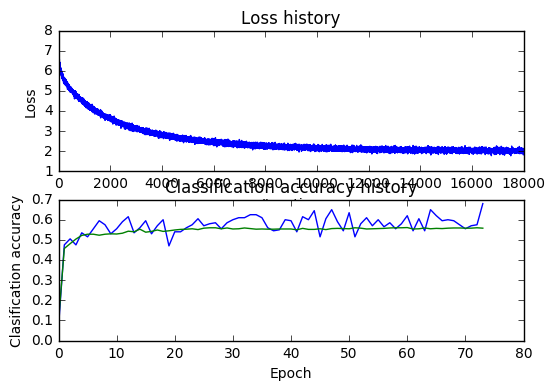

0.544
iteration 0 / 18000: loss 7.850477
iteration 100 / 18000: loss 6.018482
iteration 200 / 18000: loss 5.739161
iteration 300 / 18000: loss 5.520621
iteration 400 / 18000: loss 5.300148
iteration 500 / 18000: loss 5.033170
iteration 600 / 18000: loss 5.077779
iteration 700 / 18000: loss 4.853491
iteration 800 / 18000: loss 4.761888
iteration 900 / 18000: loss 4.544312
iteration 1000 / 18000: loss 4.506713
iteration 1100 / 18000: loss 4.232191
iteration 1200 / 18000: loss 4.191630
iteration 1300 / 18000: loss 4.163411
iteration 1400 / 18000: loss 4.040666
iteration 1500 / 18000: loss 4.003467
iteration 1600 / 18000: loss 3.993442
iteration 1700 / 18000: loss 3.914256
iteration 1800 / 18000: loss 3.737989
iteration 1900 / 18000: loss 3.656936
iteration 2000 / 18000: loss 3.610275
iteration 2100 / 18000: loss 3.518491
iteration 2200 / 18000: loss 3.439030
iteration 2300 / 18000: loss 3.435614
iteration 2400 / 18000: loss 3.389836
iteration 2500 / 18000: loss 3.289759
iteration 2600 / 1

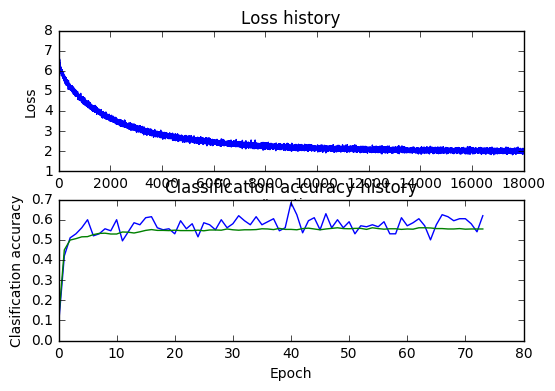

0.551
iteration 0 / 18000: loss 7.415642
iteration 100 / 18000: loss 6.065491
iteration 200 / 18000: loss 5.795556
iteration 300 / 18000: loss 5.563999
iteration 400 / 18000: loss 5.355701
iteration 500 / 18000: loss 5.124699
iteration 600 / 18000: loss 4.987965
iteration 700 / 18000: loss 4.952279
iteration 800 / 18000: loss 4.798571
iteration 900 / 18000: loss 4.582434
iteration 1000 / 18000: loss 4.337396
iteration 1100 / 18000: loss 4.401452
iteration 1200 / 18000: loss 4.363261
iteration 1300 / 18000: loss 4.233735
iteration 1400 / 18000: loss 4.086555
iteration 1500 / 18000: loss 4.204882
iteration 1600 / 18000: loss 3.846346
iteration 1700 / 18000: loss 3.733128
iteration 1800 / 18000: loss 3.779636
iteration 1900 / 18000: loss 3.803641
iteration 2000 / 18000: loss 3.627484
iteration 2100 / 18000: loss 3.558032
iteration 2200 / 18000: loss 3.519086
iteration 2300 / 18000: loss 3.496925
iteration 2400 / 18000: loss 3.451463
iteration 2500 / 18000: loss 3.436338
iteration 2600 / 1

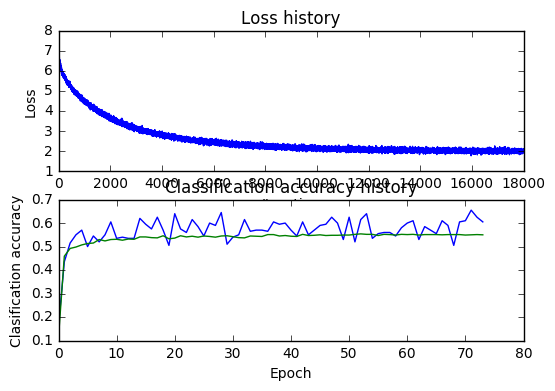

0.544
iteration 0 / 18000: loss 7.495636
iteration 100 / 18000: loss 6.131832
iteration 200 / 18000: loss 5.726972
iteration 300 / 18000: loss 5.614175
iteration 400 / 18000: loss 5.358363
iteration 500 / 18000: loss 5.173869
iteration 600 / 18000: loss 5.160812
iteration 700 / 18000: loss 4.895905
iteration 800 / 18000: loss 4.958026
iteration 900 / 18000: loss 4.510039
iteration 1000 / 18000: loss 4.515660
iteration 1100 / 18000: loss 4.490034
iteration 1200 / 18000: loss 4.480510
iteration 1300 / 18000: loss 4.237517
iteration 1400 / 18000: loss 4.183992
iteration 1500 / 18000: loss 4.024836
iteration 1600 / 18000: loss 4.071903
iteration 1700 / 18000: loss 3.972385
iteration 1800 / 18000: loss 3.767782
iteration 1900 / 18000: loss 3.706651
iteration 2000 / 18000: loss 3.651434
iteration 2100 / 18000: loss 3.586207
iteration 2200 / 18000: loss 3.484799
iteration 2300 / 18000: loss 3.466682
iteration 2400 / 18000: loss 3.372602
iteration 2500 / 18000: loss 3.355960
iteration 2600 / 1

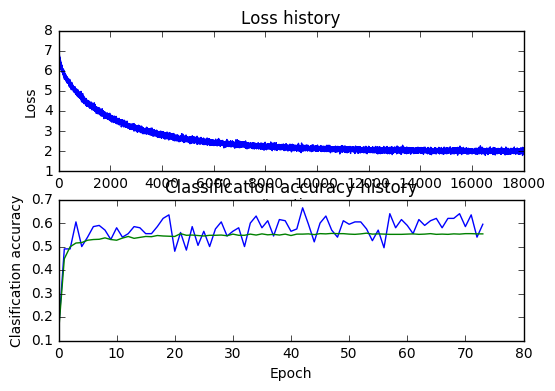

0.549
iteration 0 / 18000: loss 8.086829
iteration 100 / 18000: loss 6.300792
iteration 200 / 18000: loss 5.894925
iteration 300 / 18000: loss 5.591726
iteration 400 / 18000: loss 5.470034
iteration 500 / 18000: loss 5.348642
iteration 600 / 18000: loss 5.145161
iteration 700 / 18000: loss 4.887883
iteration 800 / 18000: loss 4.769325
iteration 900 / 18000: loss 4.572327
iteration 1000 / 18000: loss 4.602416
iteration 1100 / 18000: loss 4.427584
iteration 1200 / 18000: loss 4.423047
iteration 1300 / 18000: loss 4.461976
iteration 1400 / 18000: loss 4.241245
iteration 1500 / 18000: loss 4.058239
iteration 1600 / 18000: loss 4.004631
iteration 1700 / 18000: loss 4.050972
iteration 1800 / 18000: loss 3.803307
iteration 1900 / 18000: loss 3.795535
iteration 2000 / 18000: loss 3.762803
iteration 2100 / 18000: loss 3.545194
iteration 2200 / 18000: loss 3.558987
iteration 2300 / 18000: loss 3.502313
iteration 2400 / 18000: loss 3.426935
iteration 2500 / 18000: loss 3.435897
iteration 2600 / 1

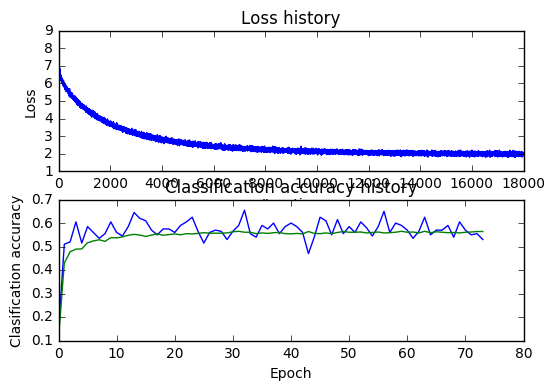

0.538
iteration 0 / 18000: loss 7.909365
iteration 100 / 18000: loss 6.522484
iteration 200 / 18000: loss 6.029069
iteration 300 / 18000: loss 5.755081
iteration 400 / 18000: loss 5.736220
iteration 500 / 18000: loss 5.422002
iteration 600 / 18000: loss 5.162393
iteration 700 / 18000: loss 5.130067
iteration 800 / 18000: loss 4.857483
iteration 900 / 18000: loss 4.883346
iteration 1000 / 18000: loss 4.670950
iteration 1100 / 18000: loss 4.754530
iteration 1200 / 18000: loss 4.599992
iteration 1300 / 18000: loss 4.490009
iteration 1400 / 18000: loss 4.182643
iteration 1500 / 18000: loss 4.228833
iteration 1600 / 18000: loss 4.080961
iteration 1700 / 18000: loss 3.972367
iteration 1800 / 18000: loss 3.923570
iteration 1900 / 18000: loss 3.701543
iteration 2000 / 18000: loss 3.679999
iteration 2100 / 18000: loss 3.587923
iteration 2200 / 18000: loss 3.587868
iteration 2300 / 18000: loss 3.525068
iteration 2400 / 18000: loss 3.382171
iteration 2500 / 18000: loss 3.425538
iteration 2600 / 1

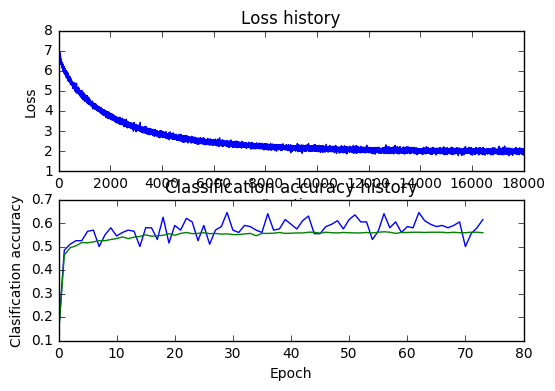

0.533
iteration 0 / 18000: loss 7.942900
iteration 100 / 18000: loss 6.410835
iteration 200 / 18000: loss 6.205498
iteration 300 / 18000: loss 5.843878
iteration 400 / 18000: loss 5.703004
iteration 500 / 18000: loss 5.385271
iteration 600 / 18000: loss 5.167253
iteration 700 / 18000: loss 5.054334
iteration 800 / 18000: loss 4.933978
iteration 900 / 18000: loss 4.873786
iteration 1000 / 18000: loss 4.637521
iteration 1100 / 18000: loss 4.533364
iteration 1200 / 18000: loss 4.518753
iteration 1300 / 18000: loss 4.444319
iteration 1400 / 18000: loss 4.135122
iteration 1500 / 18000: loss 4.050251
iteration 1600 / 18000: loss 3.990050
iteration 1700 / 18000: loss 3.948830
iteration 1800 / 18000: loss 3.966301
iteration 1900 / 18000: loss 3.781196
iteration 2000 / 18000: loss 3.836282
iteration 2100 / 18000: loss 3.610859
iteration 2200 / 18000: loss 3.519559
iteration 2300 / 18000: loss 3.680223
iteration 2400 / 18000: loss 3.443428
iteration 2500 / 18000: loss 3.325668
iteration 2600 / 1

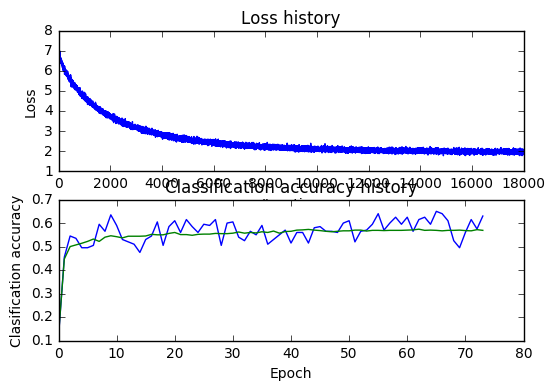

0.54


In [9]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None
best_val=-1
################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# keys=[(ii,jj) for ii in ]
# for key in keys
learning_rates=3*10**(np.arange(-4,-1.5,0.5))
regs=np.arange(0.3,0.8,0.1)
# keys=[(ii,jj) for ii ]
for reg in (np.arange(0.001,0.01,0.0002)):
    net = TwoLayerNet(input_dim, hidden_dim, num_classes,std=6e-3)
    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=18000, batch_size=200,
            learning_rate=0.0238298470417, learning_rate_decay=0.95,
            reg=reg, verbose=True)

    # Predict on the validation set
    val_acc = (net.predict(X_val_feats) == y_val).mean()
    print reg,val_acc
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.show()
    test_acc = (net.predict(X_test_feats) == y_test).mean()
    print test_acc
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [6]:
val_acc = (net.predict(X_val_feats) == y_val).mean()
print val_acc

0.54


In [7]:
results

NameError: name 'results' is not defined

In [8]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print test_acc

0.543


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!